## Insert Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("out.csv")

In [3]:
df.shape


(327712, 4)

In [4]:
df


,ID,title,subject_lang,year
0,17883,Tägufa kea hämprio (Read three languages: Kama...,Kalam [kmh],1965
1,38190,Babo bitaro (Big brother) [primer],Ogea [eri],1985
2,159358,Adame eiki (Aids and you) [health book],Barai [bbb],1993
3,142885,God atarre tumaa yenbo: Nupela Testamen (New T...,Yessan-Mayo [yss],1980
4,89609,Mini awaan yaa awanduune animan yaningko pariw...,Yonggom [yon],1999
...,...,...,...,...
327707,545015,10. Macbeth through the computer: Literary eva...,NaN,2008
327708,545016,"Language, Discourse, Style. Selected works of ...",NaN,2016
327709,183356,"Synonymy, allomorphy, and free variation in Se...","Selkup [sel] (computerized assignment from ""se...",2004
327710,320409,"Grammatika Slovenska, săveršennago iskusstva o...",Ukrainian [ukr],1596


It is a big dataset with mainly categorical data and many unique values which will make the data hard to work with.

In [7]:
df.isnull().sum()
#find missing data

ID                   0
title             2263
subject_lang    136384
year              6542
dtype: int64

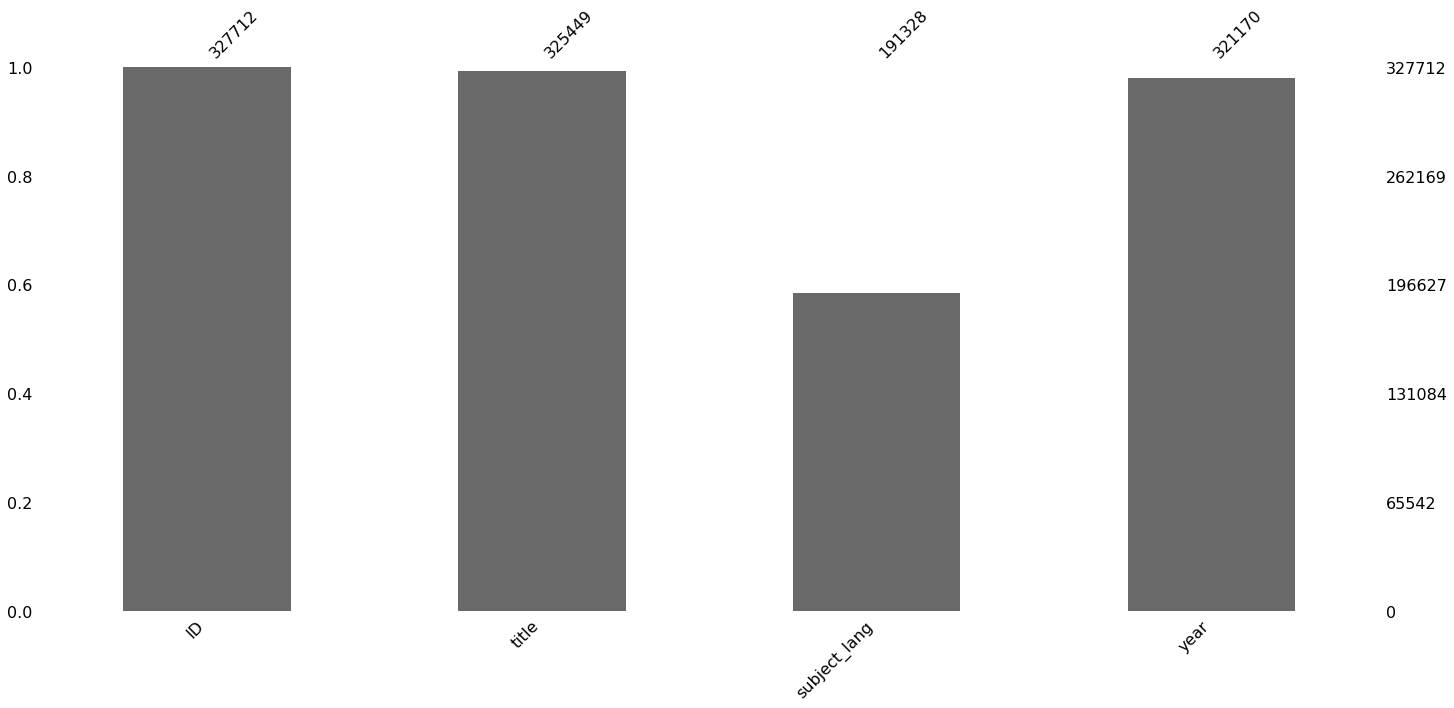

In [8]:
import missingno as msno

msno.bar(df) 

#Visualization of the proportions of missing data.

In [74]:
df_sub = df['subject_lang'].value_counts()
df_sub.head(50)

#Count the number of times languages appear

German [deu] (computerized assignment from "german")                                            1317
Swahili [swh] (computerized assignment from "swahili")                                          1263
Spanish [spa] (computerized assignment from "spanish")                                          1222
French [fra] (computerized assignment from "french")                                            1132
Hausa [hau] (autotranslated from Maho's coding system)                                          1130
Luxembourgish [ltz]                                                                             1029
Nde-Nsele-Nta [ndd] (computerized assignment from "words")                                       918
Japanese [jpn] (computerized assignment from "not among and not eastern and japanese")           877
Afrikaans [afr] (autotranslated from Maho's coding system)                                       829
Nama (Namibia) [naq] (autotranslated from Maho's coding system)                            

In [75]:
df_sub.tail(50)

# Check tail to see which dialets and languages are represented. 

Guyanese Creole English [gyn] (computerized assignment from "creolese")                                                                                                                                                                                                                                                                                                                      1
Zakho = Christian Neo-Aramaic of Zakho = Chaldean Neo-Aramaic [cld], Dihok                                                                                                                                                                                                                                                                                                                   1
Dan of the canton of Calé = Dan [daf]                                                                                                                                                                                                     

In [73]:
df_sub[df_sub == 1].sum()
# How many dialects only appear once?

21800

Out of the 36036 languages, 21800 are unique languages that only occur once. 

## Making catergorical bins for years to see which periods are most represented. Results will be subjective could still have some value insight.

In [80]:
df['year'].astype(str)

0         1965
1         1985
2         1993
3         1980
4         1999
          ... 
327707    2008
327708    2016
327709    2004
327710    1596
327711    2014
Name: year, Length: 327712, dtype: object

In [87]:
df_year = df[(df.year.str.len() == 4)]

In [88]:
df_year.dropna()

,ID,title,subject_lang,year
0,17883,Tägufa kea hämprio (Read three languages: Kama...,Kalam [kmh],1965
1,38190,Babo bitaro (Big brother) [primer],Ogea [eri],1985
2,159358,Adame eiki (Aids and you) [health book],Barai [bbb],1993
3,142885,God atarre tumaa yenbo: Nupela Testamen (New T...,Yessan-Mayo [yss],1980
4,89609,Mini awaan yaa awanduune animan yaningko pariw...,Yonggom [yon],1999
...,...,...,...,...
327705,123240,Phonology and morphophonemics of the Mixtec of...,Alacatlatzala Mixtec [mim],1980
327706,301526,Gramática del Tu'un Savi (la lengua mixteca) d...,Mixteco Alacatlatzala [mim],2012
327709,183356,"Synonymy, allomorphy, and free variation in Se...","Selkup [sel] (computerized assignment from ""se...",2004
327710,320409,"Grammatika Slovenska, săveršennago iskusstva o...",Ukrainian [ukr],1596


In [139]:
year = df_year[df_year.year.apply(lambda x: str(x).isdigit())]

In [145]:
year['year'] = year['year'].astype(int)
year.dtypes


C:\Users\olive\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ID               int64
title           object
subject_lang    object
year             int32
dtype: object

In [148]:
year['year'].max()

2019

In [160]:
df_year['Year_periods'] = pd.cut(year.year,bins=[0,1800,1850,1900,1950,2000,2019],labels=['before 1800','1801-1850',
                                                                                          '1851-1900','1901-1950', '1951-2000', 'after 2000'])

C:\Users\olive\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


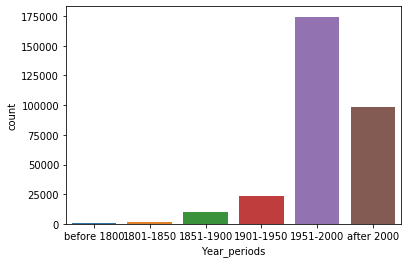

In [164]:
sns.countplot(x="Year_periods", data=df_year)
#As expected publication numbers are increasing but one can assume that minroty languages and dialect will be more recent publications.

From a brief exploration of the data it is clear that the data is messy and the categorical nature makes it more difficult to work with. Subject language and year are probably most useful in getting more insight. It is not clear that minority languages have the least publications because it seems like dialects are included in the subject language and we would need more data to get a better understanding of the signifance of dialect juxaposed with major languages. Geographical data of dialects could be helpful in getting a better understanding of which dialects could be grouped together to get a more global understanding. 
